
# 1. Install and Import Dependencies¶


In [1]:
cd yolov5/

/home/uruk380/UTC_UBUNTU/My_Own_Project/Pytorch_Yolo/yolov5


In [ ]:
!pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2.Load Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/uruk380/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-7-22 torch 1.9.0+cu102 CPU

Fusing layers... 
/home/uruk380/anaconda3/envs/Pytorch_Yolov5_env/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model


AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

# 3. Make detections with Images

In [6]:
img = 'https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg'

In [7]:
results = model(img)

In [8]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 483.5ms pre-process, 77.3ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


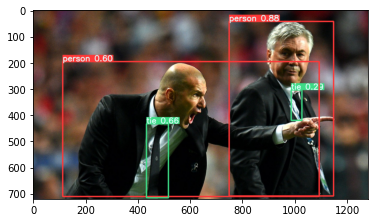

In [9]:
%matplotlib inline

plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
np.array(results.render()).shape
# it encapsulate in another set of arrays
# in order to render using matplotlib we need to basically squeeze this and extract only /
# 720 x 1280 x 3

(1, 720, 1280, 3)

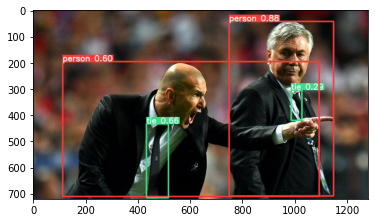

In [11]:
plt.imshow(np.squeeze(results.render()))

In [12]:
img2 = 'https://i.pinimg.com/originals/50/93/b9/5093b9787b6f52232cc605ff4301100a.jpg'


In [13]:
results2 = model(img2)
results2.print()

image 1/1: 718x1080 2 persons, 20 cars, 1 motorcycle, 1 bus, 1 traffic light
Speed: 742.2ms pre-process, 111.1ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


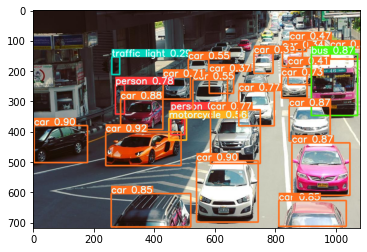

In [14]:
plt.imshow(np.squeeze(results2.render()))

https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb

In [19]:
ls

default-defdeedf-ab49-4277-80c5-5b28b0b2be05.ipynb
labelImg/
main.py
mydata/
one-minute-of-car-trafficsatisfying-videostf.avi
one-minute-of-car-trafficsatisfying-videostf.mp4
yolov5/
Yolov5_project.ipynb


In [23]:
#cap = cv2.VideoCapture('one-minute-of-car-trafficsatisfying-videostf.mp4')
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read()

  # Make detections
  results = model(frame)

  cv2.imshow('YOLO', np.squeeze(results.render()))


  if cv2.waitKey(0) & 0xFF == ord('q'):
    break
  
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [1]:
import uuid # unique  identifier useful to name our images
import os
import time

In [5]:
IMAGES_PATH = os.path.join('mydata','images')
labels = ['awake','drowsy']
number_imgs = 20


In [8]:
if not os.path.exists(IMAGES_PATH):
    if os.name=='posix':
        !mkdir -p {IMAGES_PATH}


In [ ]:
cap = cv2.VideoCapture(0)
# Label loop
for label in labels:
    print('Collecting images for {}'.format(label))

    # Image lopp
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label,img_num))
        
        # webcam
        ret, frame = cap.read()
        
        # naming out image path
        imgname = os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')

        # writes out images
        cv2.imwrite(imgname, frame)

        # render to the screen
        cv2.imshow('Image Collection',frame)
        time.sleep(2)

        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
  
cap.release()
cv2.destroyAllWindows()


In [2]:
!git clone https://github.com/tzutalin/labelImg

Clonage dans 'labelImg'...
remote: Enumerating objects: 1841, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 1841 (delta 33), reused 50 (delta 16), pack-reused 1759
Réception d'objets: 100% (1841/1841), 232.81 Mio | 529.00 Kio/s, fait.
Résolution des deltas: 100% (1080/1080), fait.


In [1]:
!pip install pyqt5 lxml --upgrade


In [3]:
cd labelImg

/home/uruk380/UTC_UBUNTU/My_Own_Project/Pytorch_Yolo/labelImg


In [4]:
!pyrcc5 -o libs/resources.py resources.qrc


Becareful we have to use YOLO Format
- The YOLO anotation format represents the following values in order:
  - class number
  - x centre coordinate
  - y centre coordinate
  - width
  - height

In [1]:
cd yolov5/

/home/uruk380/UTC_UBUNTU/My_Own_Project/Pytorch_Yolo/yolov5


now we have to create a dataset.yml in the yolov5 folder
https://github.com/ultralytics/yolov5
in this github link go to train custom data in the tutorials part




In [ ]:
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

inside yolov5/run/train
- we have experiments
  - Each time you run a new training run an experiement will be the created within be runs/train folder
  - In our exp folder we have a lot of information
  - In the results file we have the following metrics
    - The columns represent:
      - Epoch
      - Gpu Memory
      - Generalized loU (GIoU)
      - Object Loss
      - Classification Loss
      - Total Loss
      - Targets
      - Image Size
      - Precision
      - Recall
      - mAP @.5
      - mAP @.5:.95
      - Validation FIoU
      - Validation Object Loss
      - Validation Class Loss
  - 

# OPTIONAL - Compress Images for Colab Training

In [13]:
IMAGES_PATH = os.path.join('mydata','images')
LABELS_PATH = os.path.join('mydata','labels')
ARCHIVE_PATH = os.path.join('mydata','archive.tar.gz')


In [18]:
!tar -czf {ARCHIVE_PATH} {IMAGES_PATH} {LABELS_PATH}

In [17]:
ls

labelImg/  one-minute-of-car-trafficsatisfying-videostf.mp4
main.py    yolov5/
mydata/    Yolov5_project.ipynb


# 6. Load Custom Model

In [21]:
ls

labelImg/  one-minute-of-car-trafficsatisfying-videostf.mp4
main.py    yolov5/
mydata/    Yolov5_project.ipynb


In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/uruk380/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-7-22 torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [5]:
img = os.path.join('mydata', 'images', 'Capture d’écran de 2021-07-21 23-07-39.png')

In [26]:
ls

labelImg/  one-minute-of-car-trafficsatisfying-videostf.mp4
main.py    yolov5/
mydata/    Yolov5_project.ipynb


In [6]:
results = model(img)

In [28]:
results.print()

image 1/1: 1080x1920 (no detections)
Speed: 120.8ms pre-process, 101.9ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()



In [10]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Test Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
